In [1]:
from torch import tensor
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision.datasets import MNIST
from torchvision.transforms import Resize, ToTensor, Compose, Normalize
import numpy as np

In [2]:
transform = Compose([
        ToTensor(),
        Normalize(mean=[0.0], std=[1.0])]) 

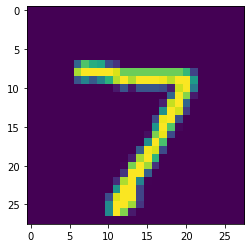

In [3]:
from torch.utils.data import DataLoader

data_train = MNIST('./', download=True, train=True, transform=transform)
data_test = MNIST('./', download=True, train=False, transform=transform)

plt.imshow(data_test.data[0])

## Задание 1
Напишите класс для нашей модели.
Не забудьте про препроцессинг данных - свернуть картинки в вектора размером 784.

Создаем класс для нашей нейронной сети. Чтобы класс был доступен для автодифференцирования и Pytorch воспринимал его как обучаемую модель - наследуем его от класса torch.nn.Module

В методе `__init__` мы прописывем архитектуру нашей модели - какие будут слои, каких они будут размеров.
Все слои мы сохраняем как свойства класса в `self.`

Метод `forward` должен описивать процесс forward pass - какие операции происходят с входящими данными. Именно на основе forward функции pytorch понимает как делать backward pass.

In [4]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size) # Your Code here
        self.layer2 = nn.Linear(hidden_size, output_size)# ...
        # ...
    
    
    def forward(self, x):
        x = x.view(-1, 784).float()
        x = self.layer1(x) # Your Code here
        x = torch.relu(x) # ...
        x = self.layer2(x) # ...
        return x

Заполните модель, лосс и оптимизатор

In [5]:
model = NeuralNetwork(784, 45, 10) # Создайте модель Neural Network
# Выберете правильный input_size, output_size и выберете hidden_size

In [6]:
loss_function = torch.nn.CrossEntropyLoss() # Какую loss функцию выберете?
# Вы можете использовать библиотеку torch.nn чтобы создать loss функцию которая вам подходит

In [12]:
from torch.optim import SGD

optim = SGD(model.parameters(), lr=0.2)
# Инициализируйте оптимизатор и передайте ему параметры модели и learning_rate

## Задание 2
Дозаполните функцию run_epoch

In [8]:
def run_epoch(data, model, loss_function, optimiser, mode='train'):
    losses, scores = [], []
    
    for x, y in tqdm_notebook(data):    
        # 1. Forward pass
        y_hat = model(x)
        
        # 2. Calculate loss
        loss = loss_function(y_hat, y)
        
        if mode == 'train':
            # 3. Make backward pass
            loss.backward()
            
            # 4. Update model with optimiser
            optim.step()
            
        # 5. Zero gradients
        optim.zero_grad()
        
        losses.append(loss.item())
        scores.append(score(y_hat, y))
    print(f"Loss {np.mean(losses)}, Accuracy: {np.mean(scores)}")

In [9]:
train = DataLoader(data_train, batch_size=256)
test = DataLoader(data_test, batch_size=512)

## Задание 3
Обучите модель хотя бы до 0.9 точности. Вы можете менять learning_rate там где инициализировали оптимизатор.
Вы так же можете экспериментировать с количеством слоев, функциями активации, количеством нейронов в скрытом слое, изменяя модель Neural Network и посмотреть на результат. Чем больше экпериментов вы проведете - тем лучше.

# Accuracy 0.97 with 0.2 learning rate, 45 hidden layers, 10 epochs and CrossEntropyLoss

In [13]:
def score(y_hat, y_true):
    preds = torch.argmax(y_hat, dim=1)
    return (preds==y_true).float().mean()

In [14]:
from tqdm import tqdm_notebook

EPOCHS = 10

for i in range(EPOCHS):
    run_epoch(train, model, loss_function, optim)
    run_epoch(test, model, loss_function, optim, mode='eval')


Loss 0.17742377525155847, Accuracy: 0.949811577796936



Loss 0.18208057172596454, Accuracy: 0.944450855255127



Loss 0.16171056875523102, Accuracy: 0.9542829990386963



Loss 0.16775896549224853, Accuracy: 0.9499713182449341



Loss 0.148590963008873, Accuracy: 0.957673966884613



Loss 0.15649194922298193, Accuracy: 0.9529641270637512



Loss 0.13770338212080457, Accuracy: 0.9606659412384033



Loss 0.1481535093858838, Accuracy: 0.9554055333137512



Loss 0.12824809770793358, Accuracy: 0.9633920192718506



Loss 0.14141196552664043, Accuracy: 0.9574562907218933



Loss 0.12014948447888836, Accuracy: 0.9656859040260315



Loss 0.13458052258938552, Accuracy: 0.9598862528800964



Loss 0.11316291461995942, Accuracy: 0.9679132699966431



Loss 0.12999364398419858, Accuracy: 0.9601792097091675



Loss 0.10695708050055706, Accuracy: 0.969392716884613



Loss 0.12505708830431103, Accuracy: 0.9615464210510254



Loss 0.10142267802532048, Accuracy: 0.9711878895759583



Loss 0.12088376274332405, Accuracy: 0.9626206159591675



Loss 0.09648341772324862, Accuracy: 0.9730662107467651



Loss 0.11683044536039233, Accuracy: 0.9637695550918579
